# Exploratory Data Analysis of Music Mood

In [1]:
import pandas as pd
import seaborn as sns
#df = pd.read_csv('../../dataset/training/train_lyrics_1000.csv', usecols=range(7))

#df.head()# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['twitter', 'lyrics-generation', 'font-style']


Exploratory analysis based on the random 1000-song training data from the Million Song data set.

<br>
<br>

### Reading in the Data

In [2]:
import pandas as pd
df = pd.read_csv('../input/lyrics-generation/train_lyrics_1000.csv', usecols=range(7))
df.head()

,file,artist,title,lyrics,genre,mood,year
0,TRAAAAW128F429D538.h5,Casual,I Didn't Mean To,Verse One:\n\nAlright I might\nHave had a litt...,Hip Hop/Rap,sad,1994
1,TRAAAEF128F4273421.h5,Adam Ant,Something Girls,Adam Ant/Marco Pirroni\nEvery girl is a someth...,Rock,happy,1982
2,TRAAAFD128F92F423A.h5,Gob,Face the Ashes,"I've just erased it's been a while, I've got a...",Rock,sad,2007
3,TRAABJV128F1460C49.h5,Lionel Richie,Tonight Will Be Alright,Little darling \nWhere you've been so long \nI...,R&B,happy,1986
4,TRAABLR128F423B7E3.h5,Blue Rodeo,Floating,"Lead Vocal by Greg\n\nWell, these late night c...",Rock,sad,1987


<br>
<br>

### Happy vs. Sad

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
blue = '#5A6FFA'
green = '#FFFF00'

In [5]:
happy, sad = sum(df.loc[:, 'mood'] == 'happy'), sum(df.loc[:, 'mood'] == 'sad')
print(happy, sad)

446 554


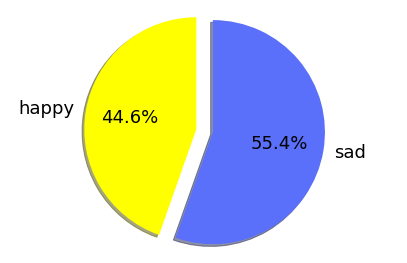

In [6]:
from matplotlib import rcParams
rcParams['font.size'] = 18

piechart = plt.pie(
    (happy, sad),
    labels=('happy','sad'),
    shadow=True,
    colors=(green, blue),
    explode=(0,0.15), # space between slices 
    startangle=90,    # rotate conter-clockwise by 90 degrees
    autopct='%1.1f%%',# display fraction as percentages
)

plt.axis('equal')   
plt.tight_layout()
#plt.savefig('./images/pie_happy_sadn.eps', dpi=300)

<br>
<br>

### Year Distribution

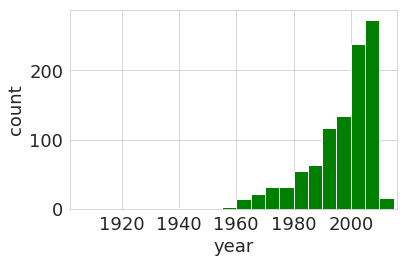

In [7]:
import numpy as np
import seaborn as sns

sns.set_style('whitegrid');

plt.hist(df['year'], bins=np.arange(1900, 2020,5),color = "green", rwidth = 20)
plt.xlabel('year')
plt.ylabel('count')
plt.xlim([df['year'].min()-5, df['year'].max()+5])
plt.tight_layout()
#plt.savefig('./images/histo_yearn.eps', dpi=300)

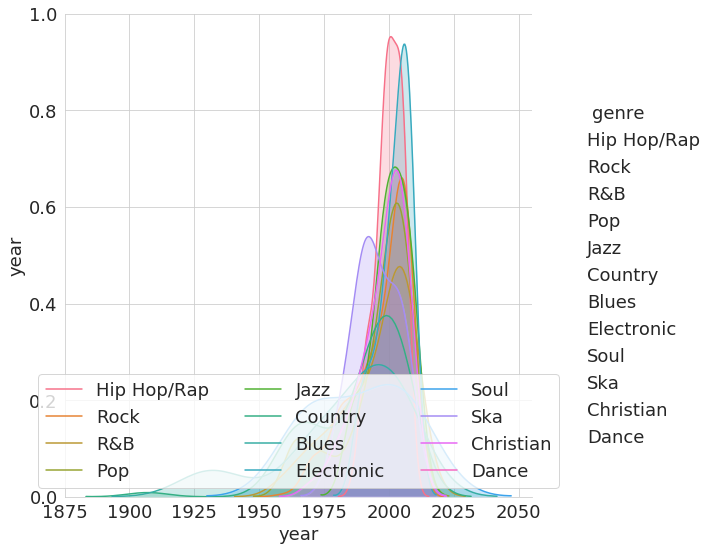

In [8]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(data = df ,hue = 'genre' ,size = 8 ,diag_kind = 'kde',palette="husl")
plt.legend(loc='lower center',  ncol=3)

<br>
<br>

### Genre Distribution

In [9]:
!pip install wordcloud

<br>
<br>

### Mood by Genre Distribution

mood         happy    sad
genre                    
Blues         17.0    7.0
Christian     27.0   17.0
Country       43.0   36.0
Dance          NaN    1.0
Electronic    19.0   21.0
Hip Hop/Rap   41.0   64.0
Jazz           2.0   12.0
Pop           47.0   35.0
R&B           30.0   23.0
Rock         205.0  328.0
Ska           10.0    7.0
Soul           5.0    3.0


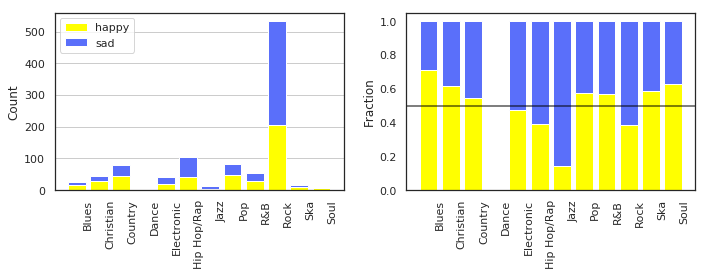

In [10]:
gclass = df.groupby(['genre', 'mood']).size().unstack()

print(gclass)



fig = plt.figure(figsize=(10,4))

sns.set(style="white")

pos = np.arange(1,13)

# absolute values
plt.subplot(121)
plt.bar(pos, gclass.values[:,0], label='happy', color=green)
plt.bar(pos, gclass.values[:,1], bottom=gclass.values[:,0], label='sad', color=blue)
plt.xticks(pos+0.5, gclass.index, rotation='vertical')
plt.ylabel("Count")
plt.xlabel("")
plt.legend(loc='upper left')

plt.gca().yaxis.grid(True) 

# relative values

# normalize
gclass = (gclass.T / gclass.T.sum()).T 

plt.subplot(122)
plt.bar(pos, gclass.values[:,0], label='happy', color=green)
plt.bar(pos, gclass.values[:,1], bottom=gclass.values[:,0], label='sad', color=blue)
plt.xticks(pos+0.5, gclass.index, rotation='vertical')
plt.ylabel('Fraction')
plt.axhline(y=0.5, xmin=0, linewidth=2, color='black', alpha=0.5)
plt.xlabel('')
plt.tight_layout()
#plt.savefig('./images/bar_genre_moodn.eps', dpi=300)

<br>
<br>

### Mood by Year Distribution

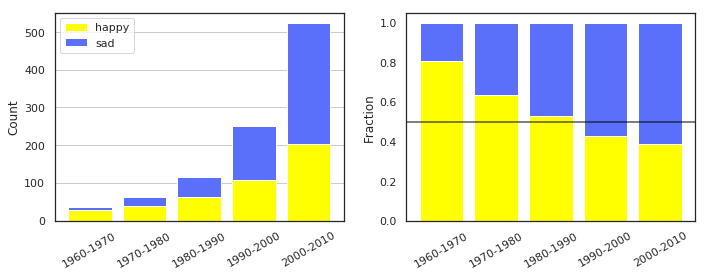

In [11]:
bins = np.arange(1960,2011,10)
happy_bins, b = np.histogram(df.loc[df.loc[:,'mood']=='happy', 'year'], bins=bins)
sad_bins, b = np.histogram(df.loc[df.loc[:,'mood']=='sad', 'year'], bins=bins)
year_bins, b = np.histogram(df.loc[:, 'year'], bins=bins)

fig = plt.figure(figsize=(10,4))

sns.set(style="white")

pos = np.arange(1,6)
labels = ['%s-%s' %(i, i+10) for i in np.arange(1960,2011,10)]

# absolute values
plt.subplot(121)
plt.bar(pos, happy_bins, label='happy', color=green)
plt.bar(pos, sad_bins, bottom=happy_bins, color=blue, label='sad')
plt.xticks(pos, labels, rotation=30)
plt.ylabel("Count")
plt.xlabel("")
plt.legend(loc='upper left')

plt.gca().yaxis.grid(True) 

# relative values

# normalize
happy_bins = happy_bins / year_bins
sad_bins = sad_bins / year_bins

plt.subplot(122)
plt.bar(pos, happy_bins, color=green)
plt.bar(pos, sad_bins, bottom=happy_bins, color=blue, label='sad')
plt.xticks(pos, labels, rotation='30')
plt.ylabel("Fraction")
plt.axhline(y=0.5, xmin=0, linewidth=2, color='black', alpha=0.5)
plt.xlabel("")
plt.tight_layout()
#plt.savefig('./images/bar_year_moodn.eps', dpi=300)

<br>
<br>

<br>
<br>

## Word Clouds

Using the WordCloud package from https://github.com/amueller/word_cloud

In [12]:
%matplotlib inline

<br>
<br>

### Word cloud of happy songs

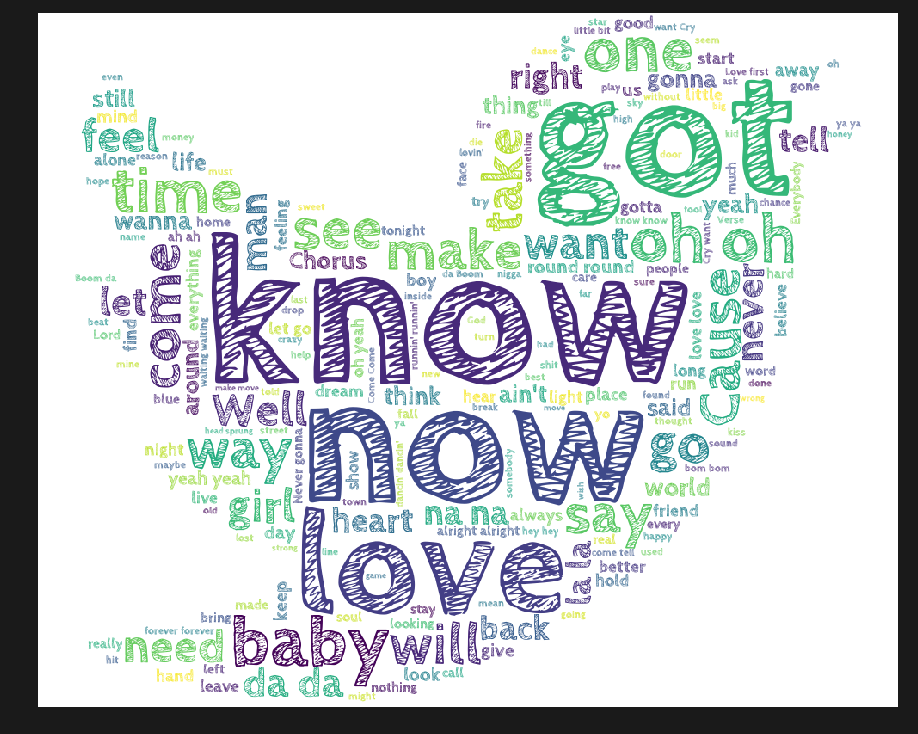

In [13]:
from scipy.misc import imread
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text 
from wordcloud import WordCloud, STOPWORDS
twitter_mask = imread('../input/twitter/twitter_mask.png', flatten=True)


happy_words = ' '.join(df.loc[df['mood']=='happy', 'lyrics']).encode().decode("utf-8", "replace")

happy_wordcloud = WordCloud( 
                      font_path='../input/font-style/CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=1800,
                      height=1400,
                      mask=twitter_mask
            ).generate(happy_words)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(happy_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<br>
<br>

### Wordcloud of sad songs

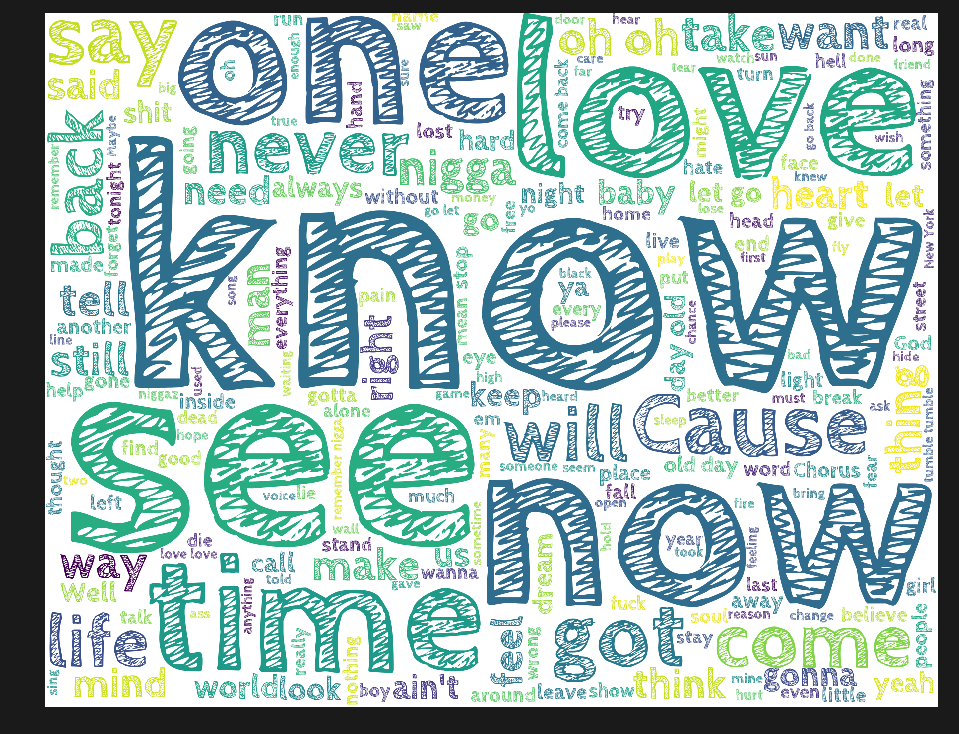

In [14]:
sad_words = ' '.join(df.loc[df['mood']=='sad', 'lyrics']).encode().decode("utf-8", "replace")

sad_wordcloud = WordCloud( 
                      font_path='../input/font-style/CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=1800,
                      height=1400
            ).generate(sad_words)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(sad_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<br>
<br>

### Wordcloud of all songs

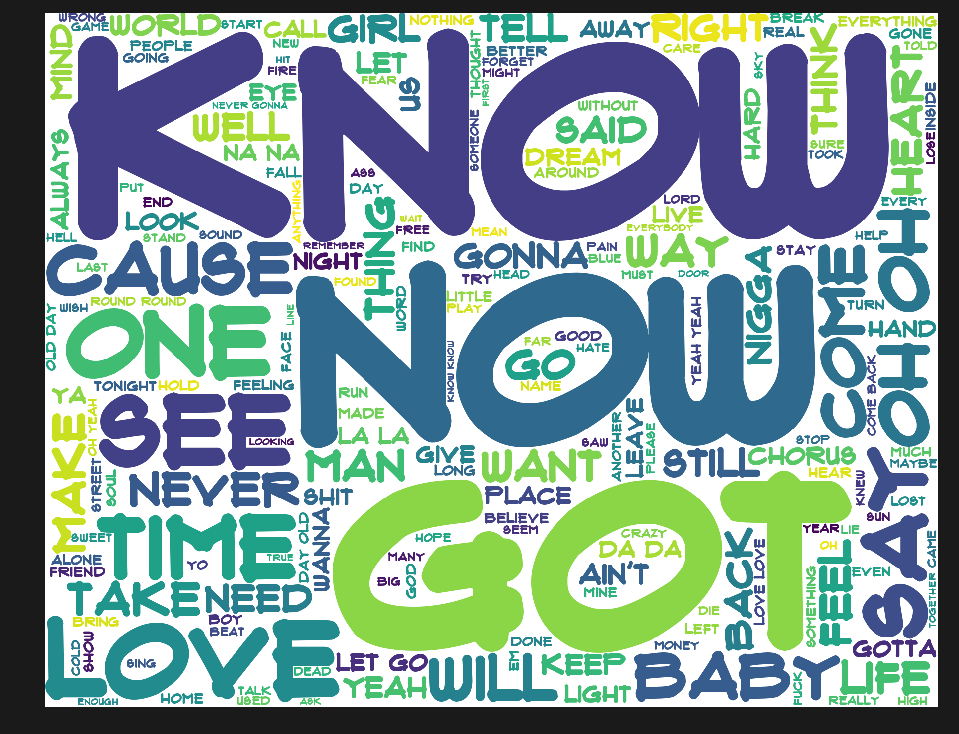

In [15]:
words = ' '.join(df.loc[:, 'lyrics']).encode().decode("utf-8", "replace")

wordcloud = WordCloud( 
                      font_path='../input/font-style/flux architect bold.ttf',
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=1800,
                      height=1400
            ).generate(words)




plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
